## Introduction and Setup

**What is PrimeKG?**

PrimeKG is a precision medicine knowledge graph curated by Harvard PhD students that integrates drugs, diseases, phenotypes, proteins, and other medical entities into a single, structured graph. Each node represents a biomedical concept, and each edge represents a known or inferred relationship between them.

You can find more information about it here: https://github.com/mims-harvard/PrimeKG



## Section 1: Load Data and Explore Edges
 Load the PrimeKG edge list from CSV and inspecting a few rows to understand the schema.

Each row in the dataset represents a biomedical relationship with the following key fields:

- x_*: Source node (e.g., gene, drug)

- y_*: Target node (e.g., phenotype, disease)

- relation / display_relation: Type of biological relation (e.g., ppi, drug_target, disease_phenotype_positive)




In [5]:
import pandas as pd

df_kg=pd.read_csv("kg.csv")
df_kg.head()

/var/folders/ht/cmjf8n0d4m92s779lvtr3kcr0000gn/T/ipykernel_60858/433895155.py:3: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_kg=pd.read_csv("kg.csv")


,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
0,protein_protein,ppi,0,9796,gene/protein,PHYHIP,NCBI,8889,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,1,7918,gene/protein,GPANK1,NCBI,2798,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,2,8233,gene/protein,ZRSR2,NCBI,5646,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,3,4899,gene/protein,NRF1,NCBI,11592,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,4,5297,gene/protein,PI4KA,NCBI,2122,8601,gene/protein,RGS20,NCBI


The following table represents edges in the PrimeKG graph. Each row describes a relationship between two biomedical entities, including their type, names, and sources.

- `x_*` columns represent the **source node**
- `y_*` columns represent the **target node**
- `relation` and `display_relation` describe the edge type

In [3]:
df_kg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100498 entries, 0 to 8100497
Data columns (total 12 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   relation          object
 1   display_relation  object
 2   x_index           int64 
 3   x_id              object
 4   x_type            object
 5   x_name            object
 6   x_source          object
 7   y_index           int64 
 8   y_id              object
 9   y_type            object
 10  y_name            object
 11  y_source          object
dtypes: int64(2), object(10)
memory usage: 741.6+ MB


In [8]:
# Node type counts
node_types = pd.concat([
    df_kg[['x_index', 'x_type']].rename(columns={'x_index': 'index', 'x_type': 'type'}),
    df_kg[['y_index', 'y_type']].rename(columns={'y_index': 'index', 'y_type': 'type'})
]).drop_duplicates()

print("\nNode type counts:")
print(node_types['type'].value_counts())

# Edge type counts remain the same
print("\nEdge type counts:")
print(df_kg['relation'].value_counts())



Node type counts:
type
biological_process    28642
gene/protein          27671
disease               17080
effect/phenotype      15311
anatomy               14035
molecular_function    11169
drug                   7957
cellular_component     4176
pathway                2516
exposure                818
Name: count, dtype: int64

Edge type counts:
relation
anatomy_protein_present       3036406
drug_drug                     2672628
protein_protein                642150
disease_phenotype_positive     300634
bioprocess_protein             289610
cellcomp_protein               166804
disease_protein                160822
molfunc_protein                139060
drug_effect                    129568
bioprocess_bioprocess          105772
pathway_protein                 85292
disease_disease                 64388
contraindication                61350
drug_protein                    51306
anatomy_protein_absent          39774
phenotype_phenotype             37472
anatomy_anatomy                 28

In [9]:
# Unique node count using globally unique indices
unique_nodes = set(df_kg['x_index']).union(set(df_kg['y_index']))
print("Total unique nodes:", len(unique_nodes))

# Unique edge count based on (source, target, relation) triplet
unique_edges = df_kg[['x_index', 'y_index', 'relation']].drop_duplicates()
print("Total unique edges:", len(unique_edges))



Total unique nodes: 129375
Total unique edges: 8100128


In [10]:
# Count unique relations
unique_relations = df_kg["relation"].value_counts()
print("\nUnique Relations:\n", unique_relations)


Unique Relations:
 relation
anatomy_protein_present       3036406
drug_drug                     2672628
protein_protein                642150
disease_phenotype_positive     300634
bioprocess_protein             289610
cellcomp_protein               166804
disease_protein                160822
molfunc_protein                139060
drug_effect                    129568
bioprocess_bioprocess          105772
pathway_protein                 85292
disease_disease                 64388
contraindication                61350
drug_protein                    51306
anatomy_protein_absent          39774
phenotype_phenotype             37472
anatomy_anatomy                 28064
molfunc_molfunc                 27148
indication                      18776
cellcomp_cellcomp                9690
phenotype_protein                6660
off-label use                    5136
pathway_pathway                  5070
exposure_disease                 4608
exposure_exposure                4140
exposure_bioprocess  

## Extracting specific relationships
As you can see, PrimeKG contains many rich relationships that could be valuable for building powerful predictive models. However, for this project, the focus is on a subset of these relationships to keep the scope manageable and the analysis focused.

In [8]:
# Relationships to extract
selected_relations = [
    "protein_protein",
    "disease_phenotype_positive",
    "bioprocess_protein",
    "disease_protein",
    "drug_effect",
    "pathway_protein",
    "disease_disease",
    "contraindication",
    "drug_protein",
    "indication"
]

# Filter the dataframe
filtered_df = df_kg[df_kg["relation"].isin(selected_relations)]

# Save filtered dataframe
filtered_df.to_csv("filtered_primekg.csv", index=False)


In [3]:
import pandas as pd
filtered_df=pd.read_csv("filtered_primekg.csv")

/var/folders/ht/cmjf8n0d4m92s779lvtr3kcr0000gn/T/ipykernel_60858/2766396762.py:2: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df=pd.read_csv("filtered_primekg.csv")


In [4]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803896 entries, 0 to 1803895
Data columns (total 12 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   relation          object
 1   display_relation  object
 2   x_index           int64 
 3   x_id              object
 4   x_type            object
 5   x_name            object
 6   x_source          object
 7   y_index           int64 
 8   y_id              object
 9   y_type            object
 10  y_name            object
 11  y_source          object
dtypes: int64(2), object(10)
memory usage: 165.2+ MB


In [10]:
filtered_df.head()

,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
0,protein_protein,ppi,0,9796,gene/protein,PHYHIP,NCBI,8889,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,1,7918,gene/protein,GPANK1,NCBI,2798,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,2,8233,gene/protein,ZRSR2,NCBI,5646,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,3,4899,gene/protein,NRF1,NCBI,11592,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,4,5297,gene/protein,PI4KA,NCBI,2122,8601,gene/protein,RGS20,NCBI


In [11]:
# Unique node count (across x_index and y_index)
unique_nodes = set(filtered_df['x_index']).union(set(filtered_df['y_index']))
print("Total unique nodes:", len(unique_nodes))

# Unique edge count (based on source, target, and relation)
unique_edges = filtered_df[['x_index', 'y_index', 'relation']].drop_duplicates()
print("Total unique edges:", len(unique_edges))


Total unique nodes: 68857
Total unique edges: 1803526


## Section 2: Basic Graph Exploration

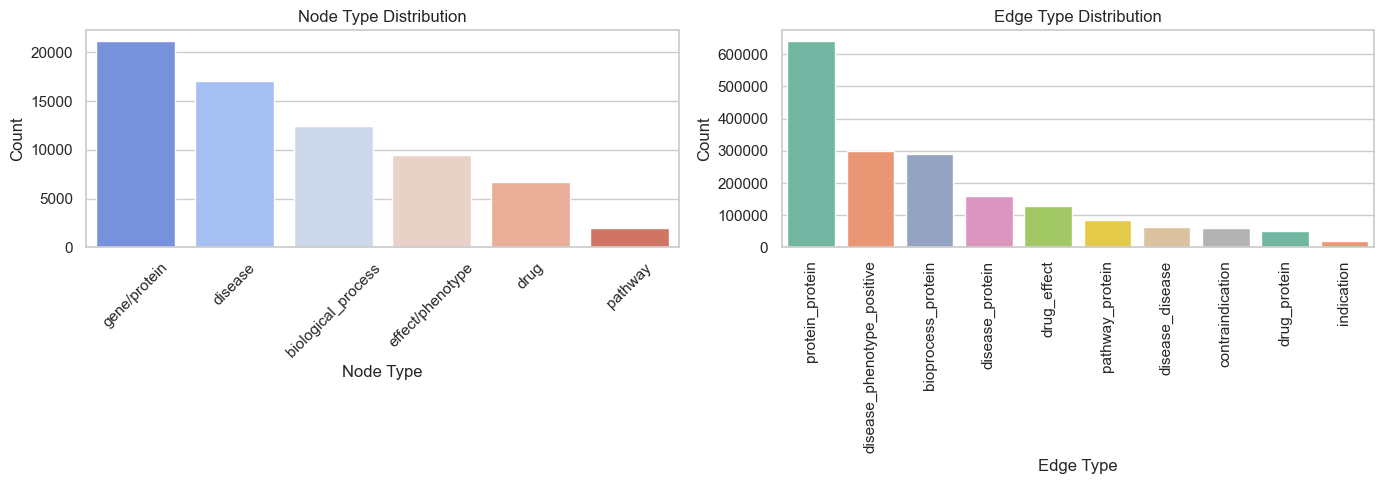


Top 15 Nodes by Degree:

Node Index   Degree   Name                           Type
----------------------------------------------------------------------
189          5427     UBC                            gene/protein
26180        2397     Autosomal recessive inheritance effect/phenotype
22759        2198     Autosomal dominant inheritance effect/phenotype
23000        1870     Seizure                        effect/phenotype
41325        1629     regulation of transcription by RNA polymerase II biological_process
119          1532     ETS1                           gene/protein
35432        1524     Mendelian disease              disease
454          1454     GATA2                          gene/protein
71           1383     CTCF                           gene/protein
178          1312     EP300                          gene/protein
22675        1311     Intellectual disability        effect/phenotype
363          1299     AR                             gene/protein
25           1297

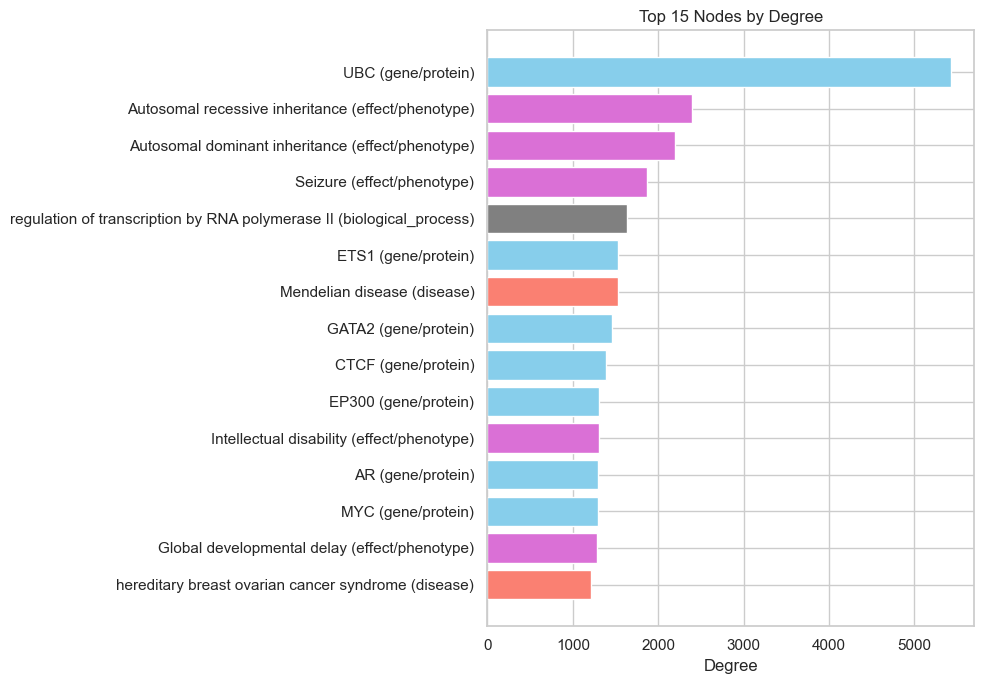

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Plot style
sns.set(style="whitegrid")

# ----- NODE TYPE DISTRIBUTION -----
x_node_types = filtered_df[['x_index', 'x_type']].rename(columns={'x_index': 'node_index', 'x_type': 'node_type'})
y_node_types = filtered_df[['y_index', 'y_type']].rename(columns={'y_index': 'node_index', 'y_type': 'node_type'})
all_nodes = pd.concat([x_node_types, y_node_types]).drop_duplicates()
node_type_counts = all_nodes['node_type'].value_counts().reset_index()
node_type_counts.columns = ['Node Type', 'Count']

# ----- EDGE TYPE DISTRIBUTION -----
edge_type_counts = filtered_df['relation'].value_counts().reset_index()
edge_type_counts.columns = ['Edge Type', 'Count']

# ----- PLOTTING NODE + EDGE TYPE DISTRIBUTIONS -----
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=node_type_counts, x='Node Type', y='Count', hue='Node Type', ax=axs[0], palette='coolwarm', legend=False)
axs[0].set_title("Node Type Distribution")
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(data=edge_type_counts, x='Edge Type', y='Count', hue='Edge Type', ax=axs[1], palette='Set2', legend=False)
axs[1].set_title("Edge Type Distribution")
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# ----- BUILD GRAPH USING UNIQUE INDICES -----
G = nx.from_pandas_edgelist(filtered_df, source='x_index', target='y_index', create_using=nx.Graph())

# Add node attributes (type + name) for x and y nodes
for _, row in filtered_df.iterrows():
    G.nodes[row['x_index']]['type'] = row['x_type']
    G.nodes[row['x_index']]['name'] = row['x_name']
    G.nodes[row['y_index']]['type'] = row['y_type']
    G.nodes[row['y_index']]['name'] = row['y_name']

# ----- TOP-K NODES BY DEGREE -----
top_k = 15
degree_dict = dict(G.degree())
top_degree_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:top_k]

print(f"\nTop {top_k} Nodes by Degree:\n")
print(f"{'Node Index':<12} {'Degree':<8} {'Name':<30} {'Type'}")
print("-" * 70)
for node_idx, degree in top_degree_nodes:
    name = G.nodes[node_idx].get('name', 'N/A')
    node_type = G.nodes[node_idx].get('type', 'N/A')
    print(f"{node_idx:<12} {degree:<8} {name:<30} {node_type}")

# Prepare data for plotting
labels = []
degrees = []
colors = []

for node_idx, degree in top_degree_nodes:
    name = G.nodes[node_idx].get('name', str(node_idx))
    node_type = G.nodes[node_idx].get('type', 'unknown')
    label = f"{name} ({node_type})"
    labels.append(label)
    degrees.append(degree)

    # Color by type
    if "gene" in node_type or "protein" in node_type:
        colors.append("skyblue")
    elif "disease" in node_type:
        colors.append("salmon")
    elif "phenotype" in node_type:
        colors.append("orchid")
    else:
        colors.append("gray")

# Plot top-degree nodes
plt.figure(figsize=(10, 7))
plt.barh(labels[::-1], degrees[::-1], color=colors[::-1])
plt.title("Top 15 Nodes by Degree")
plt.xlabel("Degree")
plt.tight_layout()
plt.show()


## Visualizing the Neighborhood of Breast Cancer

This snippet creates an interactive subgraph focused on a specific biomedical concept — in this case, "breast cancer". Here's what the script does:

- Locates the node corresponding to breast cancer within the dataset.

- Builds an undirected graph using NetworkX, enriched with node and edge metadata.

- Identifies the top 25 neighbors of the node, ranked by their degree (i.e., number of connections).

Constructs a PyVis-powered subgraph that highlights:

- Node types with distinct colors (e.g., gene/protein, disease).

- Edge relationships using labeled connections and custom color-coding.

- The central node ("breast cancer") in gold, to visually emphasize the focal point.

This approach offers an intuitive way to explore the biomedical context surrounding a disease — and how it's embedded in a larger knowledge graph.

In [14]:
from pyvis.network import Network
import networkx as nx

# Find node index for 'breast cancer'
mask = (filtered_df['x_name'].str.lower() == "breast cancer") | (filtered_df['y_name'].str.lower() == "breast cancer")
if not mask.any():
    raise ValueError("Node 'breast cancer' not found in x_name or y_name.")

row = filtered_df[mask].iloc[0]
target_index = row['x_index'] if row['x_name'].lower() == "breast cancer" else row['y_index']

# Build graph using unique node index
G = nx.from_pandas_edgelist(
    filtered_df, 
    source='x_index', 
    target='y_index', 
    edge_attr='relation', 
    create_using=nx.Graph()
)

# Add node attributes using index
for _, row in filtered_df.iterrows():
    G.nodes[row['x_index']]['name'] = row['x_name']
    G.nodes[row['x_index']]['type'] = row['x_type']
    G.nodes[row['y_index']]['name'] = row['y_name']
    G.nodes[row['y_index']]['type'] = row['y_type']

# Top 25 neighbors of 'breast cancer' by degree
neighbors = list(G.neighbors(target_index))
top_neighbors = sorted(neighbors, key=lambda n: G.degree(n), reverse=True)[:25]
sub_nodes = top_neighbors + [target_index]
subG = G.subgraph(sub_nodes)

# Create PyVis network
net = Network(height="800px", width="100%", notebook=True, bgcolor="#ffffff", font_color="black", cdn_resources="remote")
net.barnes_hut(gravity=-25000, central_gravity=0.3, spring_length=200, spring_strength=0.05, damping=0.95)

# Node type color mapping
type_colors = {
    "gene/protein": "skyblue",
    "disease": "salmon",
    "effect/phenotype": "orchid",
    "biological_process": "gray"
}

# Edge relation color mapping
edge_colors = {
    "drug_effect": "red",
    "disease_protein": "purple",
    "disease_phenotype_positive": "green"
}

# Add nodes
for node in subG.nodes():
    name = G.nodes[node].get('name', str(node))
    ntype = G.nodes[node].get('type', 'unknown')
    color = "gold" if node == target_index else type_colors.get(ntype, "lightgray")
    size = 35 if node == target_index else 22

    net.add_node(
    int(node),  
    label=name,
    color=color,
    size=size,
    title=f"{name} ({ntype})",
    font={"size": 20}
)


# Add edges with color and labels
for u, v, data in subG.edges(data=True):
    relation = data.get("relation", "")
    edge_color = edge_colors.get(relation, "#999999")

    net.add_edge(int(u), int(v),
             title=relation,
             label=relation,
             color=edge_color,
             width=2.5,
             font={"size": 16, "align": "middle"})


# Save the visualization
net.show("html_files/breast_cancer_top25_subgraph_highlighted.html")


# from IPython.display import IFrame
# IFrame("breast_cancer_top25_subgraph_highlighted.html", width="100%", height="800px")


html_files/breast_cancer_top25_subgraph_highlighted.html


In [15]:

# Step 1: Filter for only 'disease_protein' edges
dp_edges = filtered_df[filtered_df['relation'] == 'disease_protein']

# Step 2: Identify the node index for 'breast cancer'
mask = (dp_edges['x_name'].str.lower() == "breast cancer") | (dp_edges['y_name'].str.lower() == "breast cancer")
if not mask.any():
    raise ValueError("Breast cancer node not found in disease_protein edges.")

row = dp_edges[mask].iloc[0]
bc_index = row['x_index'] if row['x_name'].lower() == "breast cancer" else row['y_index']
bc_index = int(bc_index)  # Ensure it's a native int

# Step 3: Find gene/protein neighbors
bc_neighbors_df = dp_edges[
    ((dp_edges['x_index'] == bc_index) & (dp_edges['y_type'] == 'gene/protein')) |
    ((dp_edges['y_index'] == bc_index) & (dp_edges['x_type'] == 'gene/protein'))
]

# Get top 10 neighbors by degree
neighbor_indices = bc_neighbors_df.apply(lambda row: row['y_index'] if row['x_index'] == bc_index else row['x_index'], axis=1)
top_neighbors = neighbor_indices.value_counts().head(10).index.tolist()

# Keep only top 10 relevant edges
top_edges_df = bc_neighbors_df[
    bc_neighbors_df.apply(
        lambda row: (row['y_index'] in top_neighbors or row['x_index'] in top_neighbors),
        axis=1
    )
]

# Step 4: Build PyVis graph
net = Network(height="700px", width="100%", notebook=True, bgcolor="#ffffff", font_color="black", cdn_resources="remote")
net.barnes_hut(gravity=-12000, central_gravity=0.4, spring_length=150)

# Add breast cancer node
net.add_node(
    int(bc_index),
    label="breast cancer",
    color="gold",
    size=35,
    title="breast cancer (disease)",
    font={"size": 40}
)

# Add top protein neighbors and edges
for _, row in top_edges_df.iterrows():
    neighbor_id = row['y_index'] if row['x_index'] == bc_index else row['x_index']
    neighbor_name = row['y_name'] if row['x_index'] == bc_index else row['x_name']
    neighbor_id = int(neighbor_id)

    net.add_node(
        neighbor_id,
        label=neighbor_name,
        color="skyblue",
        size=20,
        title=f"{neighbor_name} (gene/protein)",
        font={"size": 32}
    )

    net.add_edge(
        int(bc_index),
        neighbor_id,
        title="disease_protein",
        label="disease_protein",
        color="grey",
        width=2,
        font={"size": 20, "align": "top"}
    )

# PyVis global styling
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 30,
      "face": "Open Sans"
    },
    "labelHighlightBold": false
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "font": {
      "size": 18,
      "face": "Open Sans",
      "align": "top"
    },
    "smooth": {
      "type": "dynamic"
    }
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -12000,
      "centralGravity": 0.3,
      "springLength": 150,
      "springConstant": 0.01,
      "damping": 0.8
    },
    "minVelocity": 0.75
  }
}
""")

# Show and save
net.show("html_files/breast_cancer_top10_proteins.html")



# For notebooks:
# from IPython.display import IFrame
# IFrame("breast_cancer_top10_proteins.html", width="100%", height="700px")


html_files/breast_cancer_top10_proteins.html


## Section 3: Centrality Measures
In this section, the four key centrality measures are computed using the graph-tool library — a highly optimized C++-based library for complex network analysis. These measures help quantify the influence, connectivity, and strategic importance of nodes in the biomedical knowledge graph.

The centralities calculated are:

- Degree Centrality – How many direct connections a node has.

- Betweenness Centrality – How often a node lies on the shortest path between other nodes.

- Closeness Centrality – How close a node is to all others in the network.

- PageRank – A probabilistic measure of a node’s importance based on the quality of its neighbors.

The graph is first built using graph-tool, and the results are stored in a structured DataFrame for further analysis and visualization. This dataset will later be used to identify the most central biomedical entities in the graph.

In [16]:
from graph_tool.all import Graph, betweenness, closeness, pagerank

# Create directed graph-tool graph
G_gt = Graph(directed=True)

# Ensure node_index is int for graph-tool compatibility
filtered_df["x_index"] = filtered_df["x_index"].astype(int)
filtered_df["y_index"] = filtered_df["y_index"].astype(int)

# Map node indices to graph-tool vertices
node_map = {}
for node in pd.concat([filtered_df["x_index"], filtered_df["y_index"]]).unique():
    node_map[node] = G_gt.add_vertex()

# Add directed edges using unique indices
for _, row in filtered_df.iterrows():
    G_gt.add_edge(node_map[row["x_index"]], node_map[row["y_index"]])

# Compute centrality measures
degree_centrality = G_gt.degree_property_map("total")
betweenness_centrality, _ = betweenness(G_gt)
closeness_centrality = closeness(G_gt)
pagerank_centrality = pagerank(G_gt)

# Create DataFrame
centrality_df = pd.DataFrame({
    "node_index": list(node_map.keys()),
    "degree_centrality": [degree_centrality[v] for v in G_gt.vertices()],
    "betweenness_centrality": [betweenness_centrality[v] for v in G_gt.vertices()],
    "closeness_centrality": [closeness_centrality[v] for v in G_gt.vertices()],
    "pagerank": [pagerank_centrality[v] for v in G_gt.vertices()]
})

# Optional: merge names from filtered_df if needed
index_to_name = filtered_df.set_index("x_index")["x_name"].to_dict()
index_to_name.update(filtered_df.set_index("y_index")["y_name"].to_dict())
centrality_df["name"] = centrality_df["node_index"].map(index_to_name)

# Save to CSV
centrality_df.to_csv("graph_tool_centrality.csv", index=False)


## Visualizing Centrality in Biomedical Graphs
This function provides a bird’s-eye view of centrality distribution across a biomedical graph by:

- Sampling 1,000 edges from the dataset for scalable rendering.

- Coloring nodes based on their centrality score (e.g., Degree, Betweenness, Closeness, or PageRank).

- Using adaptive thresholds (quantiles) to group nodes into high, medium, and low influence buckets with intuitive color schemes.

- Highlighting central nodes that may act as hubs, bridges, or influencers in the biological network.

This type of visualization is crucial to identify biomedical entities that matter most—whether they’re highly connected diseases, key proteins involved in multiple pathways, or central genes influencing network flow.

In [17]:
from pyvis.network import Network
from IPython.display import IFrame
import pandas as pd

def visualize_centrality(df, centrality_df, centrality_type, filename):
    """
    Visualizes a sampled subgraph with node colors based on a selected centrality measure.

    Parameters:
    - df: DataFrame with edges (filtered_primekg.csv)
    - centrality_df: DataFrame with centrality values (graph_tool_centrality.csv)
    - centrality_type: One of ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    - filename: Output HTML filename
    """

    # Sample a subset for visualization
    sample_df = df.sample(n=1000, random_state=42)

    # Valid centrality types
    valid_centralities = ["degree_centrality", "betweenness_centrality", "closeness_centrality", "pagerank"]
    if centrality_type not in valid_centralities:
        raise ValueError(f"Invalid centrality type. Choose from: {valid_centralities}")

    # Initialize PyVis network
    net = Network(height="700px", width="100%", notebook=True, cdn_resources="remote")
    net.barnes_hut()

    # Create lookup dict for fast access
    centrality_lookup = centrality_df.set_index("node_index")[centrality_type].to_dict()
    name_lookup = centrality_df.set_index("node_index").get("name", pd.Series()).to_dict()

    # Get quantiles for adaptive coloring
    values = list(centrality_lookup.values())
    q_high = pd.Series(values).quantile(0.90)
    q_mid = pd.Series(values).quantile(0.60)

    # Define color scheme per metric
    color_schemes = {
        "degree_centrality": ("#008080", "#90EE90", "#000080"),  # Teal, Light Green, Navy
        "betweenness_centrality": ("#800080", "#E6E6FA", "#ADD8E6"),  # Purple, Lavender, Light Blue
        "closeness_centrality": ("#4682B4", "#87CEEB", "#D3D3D3"),  # Steel Blue, Sky Blue, Light Gray
        "pagerank": ("#B22222", "#FFB6C1", "#F5F5F5")  # Firebrick, Light Pink, White Smoke
    }

    high_color, mid_color, low_color = color_schemes[centrality_type]

    # Add nodes and edges
    added_nodes = set()

    for _, row in sample_df.iterrows():
        node1, node2 = row["x_index"], row["y_index"]

        for node in [node1, node2]:
            if node in centrality_lookup and node not in added_nodes:
                val = centrality_lookup[node]
                color = (
                    high_color if val >= q_high else
                    mid_color if val >= q_mid else
                    low_color
                )
                label = name_lookup.get(node, str(node))
                net.add_node(
                    node,
                    label=label,
                    title=f"{centrality_type}: {val:.4f}",
                    color=color,
                    size=25,
                    font={"size": 20}
                )
                added_nodes.add(node)

        # Add edge (even if one of the nodes doesn't have centrality)
        net.add_edge(node1, node2)

    # Layout options
    net.set_options("""
    var options = {
      "nodes": {
        "shape": "dot",
        "scaling": { "min": 10, "max": 40 }
      },
      "edges": {
        "color": { "inherit": true },
        "smooth": false
      },
      "physics": {
        "solver": "forceAtlas2Based",
        "forceAtlas2Based": {
          "gravitationalConstant": -50,
          "centralGravity": 0.01,
          "springLength": 100,
          "springConstant": 0.08
        },
        "minVelocity": 0.75
      }
    }
    """)
    
    print(f" Graph visualization saved as: {filename}")
    net.show(filename)
    return IFrame(filename, width="100%", height="750px")


## Subgraph Visualization

## Visualizing Top-K Central Nodes and Their Neighborhood
This function extracts and visualizes localized subgraphs centered around the top k most central nodes (based on any selected centrality metric: degree, betweenness, closeness, or PageRank). For each of these top nodes:

- A limited number of 1-hop neighbors are added to reduce clutter while still preserving local structure.

- Node size is scaled by its normalized centrality score, making more central entities visually prominent.

- Node color reflects biomedical type (e.g., gene, protein, disease), allowing for intuitive interpretation.

This method offers a more granular, interpretable lens into the graph—focusing not on the full complexity of the network, but on influential hubs and their immediate biological context.



In [20]:
from sklearn.preprocessing import MinMaxScaler

def visualize_centrality_subgraph(
    edge_df,
    centrality_df,
    centrality_type,
    top_k=15,
    max_neighbors=10,
    filename="centrality_subgraph.html"
):
    """
    Visualizes a subgraph of top-k nodes by a selected centrality measure and their limited 1-hop neighbors.

    Parameters:
    - edge_df: DataFrame with edges (filtered_df)
    - centrality_df: DataFrame with centrality scores (graph_tool_centrality.csv)
    - centrality_type: Column in centrality_df (e.g. 'pagerank')
    - top_k: Number of top nodes to select
    - max_neighbors: Max 1-hop neighbors per top-k node
    - filename: Output HTML file name
    """

    if centrality_type not in centrality_df.columns:
        raise ValueError(f"{centrality_type} not found in centrality_df columns.")

    # Step 1: Build node type map
    type_map = pd.concat([
        edge_df[["x_index", "x_type"]].rename(columns={"x_index": "node", "x_type": "type"}),
        edge_df[["y_index", "y_type"]].rename(columns={"y_index": "node", "y_type": "type"})
    ]).drop_duplicates().set_index("node")["type"].to_dict()

    name_map = pd.concat([
        edge_df[["x_index", "x_name"]].rename(columns={"x_index": "node", "x_name": "name"}),
        edge_df[["y_index", "y_name"]].rename(columns={"y_index": "node", "y_name": "name"})
    ]).drop_duplicates().set_index("node")["name"].to_dict()

    # Step 2: Top-k nodes by centrality
    top_nodes = centrality_df.sort_values(centrality_type, ascending=False).head(top_k)["node_index"].tolist()

    # Step 3: Limit 1-hop neighbors
    def get_limited_subedges(edge_df, top_nodes, max_neighbors=10):
        rows = []
        for node in top_nodes:
            node_edges = edge_df[(edge_df["x_index"] == node) | (edge_df["y_index"] == node)]
            rows.append(node_edges.sample(n=min(max_neighbors, len(node_edges)), random_state=42))
        return pd.concat(rows).drop_duplicates()

    sub_edges = get_limited_subedges(edge_df, top_nodes, max_neighbors=max_neighbors)
    G = nx.from_pandas_edgelist(sub_edges, source="x_index", target="y_index")

    # Step 4: Centrality & normalized lookup
    cent_lookup = centrality_df.set_index("node_index")[centrality_type].to_dict()

    scaler = MinMaxScaler()
    cent_series = pd.Series(cent_lookup).fillna(0)
    scaled_scores = scaler.fit_transform(cent_series.values.reshape(-1, 1)).flatten()
    scaled_lookup = dict(zip(cent_series.index, scaled_scores))

    # Step 5: PyVis setup
    net = Network(height="750px", width="100%", notebook=True, bgcolor="#ffffff", font_color="black")
    net.force_atlas_2based()

    # Node color mapping
    color_map = {
        "gene/protein": "skyblue",
        "disease": "salmon",
        "effect/phenotype": "orchid",
        "biological_process": "gray"
    }

    # Step 6: Add nodes
    for node in G.nodes():
        score = cent_lookup.get(node, 0)
        scaled_score = scaled_lookup.get(node, 0)
        ntype = type_map.get(node, "unknown")
        label = name_map.get(node, str(node))
        color = color_map.get(ntype, "lightgray")

        net.add_node(
            node,
            label=label,
            title=f"{centrality_type}: {score:.5f} | Type: {ntype}",
            size=20 + (scaled_score * 60),
            color=color,
            font={"size": 40}
        )

    # Step 7: Add edges
    for u, v in G.edges():
        net.add_edge(u, v)

    # Step 8: Layout config
    net.set_options("""
    var options = {
      "nodes": {
        "shape": "dot",
        "scaling": { "min": 10, "max": 40 },
        "font": {
          "size": 25,
          "face": "arial",
          "color": "#343434"
        }
      },
      "edges": {
        "color": { "inherit": true },
        "smooth": true
      },
      "physics": {
        "solver": "repulsion",
        "repulsion": {
          "nodeDistance": 150,
          "centralGravity": 0.1
        }
      }
    }
    """)

    net.show(filename)
    display(IFrame(filename, width="100%", height="750px"))



## Visualizing Pagerank

In [21]:
visualize_centrality(
    df=filtered_df,
    centrality_df=pd.read_csv("graph_tool_centrality.csv"),
    centrality_type="pagerank",
    filename="html_files/pagerank_visualization.html"
)
from IPython.display import IFrame, display

display(IFrame(src="html_files/pagerank_visualization.html", width="100%", height="750px"))


 Graph visualization saved as: html_files/pagerank_visualization.html
html_files/pagerank_visualization.html


In [22]:
top_nodes = centrality_df.sort_values("pagerank", ascending=False).head(15)
print(top_nodes)

       node_index  degree_centrality  betweenness_centrality  \
189           189              10854                0.075707   
29453       35432               3048                0.018056   
39919       22759               4396                0.044450   
55119       46573               1078                0.009823   
39901       26180               4794                0.032220   
29711       35690               1244                0.012106   
61686      108571               1142                0.007055   
54485       40439               2296                0.014303   
54489       41325               3258                0.010504   
39983       23000               3740                0.014252   
71             71               2766                0.008717   
40080       22675               2622                0.006025   
8974         8974               2054                0.007195   
39947       25381               2566                0.004137   
454           454               2908    

## Pagerank Subgraph Visualization

In [23]:
visualize_centrality_subgraph(
    edge_df=filtered_df,
    centrality_df=centrality_df,
    centrality_type="pagerank",
    top_k=15,
    max_neighbors=10,
    filename="html_files/pagerank_top15_subgraph_v3.html"
)

html_files/pagerank_top15_subgraph_v3.html


## Visualizing Degree Centrality

In [24]:
visualize_centrality(
    df=filtered_df,
    centrality_df=centrality_df,
    centrality_type="degree_centrality",
    filename="html_files/degree_visualization.html"
)
from IPython.display import IFrame, display

display(IFrame(src="html_files/degree_visualization.html", width="100%", height="750px"))



 Graph visualization saved as: html_files/degree_visualization.html
html_files/degree_visualization.html


In [25]:
visualize_centrality(
    df=filtered_df,
    centrality_df=centrality_df,
    centrality_type="betweenness_centrality",
    filename="html_files/betweenness_visualization.html"
)
from IPython.display import IFrame, display

display(IFrame(src="html_files/betweenness_visualization.html", width="100%", height="750px"))


 Graph visualization saved as: html_files/betweenness_visualization.html
html_files/betweenness_visualization.html


## Subgraph Visualization of Closeness Centrality

In [26]:
visualize_centrality_subgraph(
    edge_df=filtered_df,
    centrality_df=centrality_df,
    centrality_type="closeness_centrality",
    top_k=15,
    max_neighbors=10,
    filename="html_files/closeness_top15_subgraph.html"
)

html_files/closeness_top15_subgraph.html


## Subgraph Visualization Degree Centrality

In [27]:
visualize_centrality_subgraph(
    edge_df=filtered_df,
    centrality_df=centrality_df.rename(columns={"degree_scaled": "degree_centrality"}),
    centrality_type="degree_centrality",
    top_k=15,
    filename="html_files/degree_centrality_subgraph.html"
)

html_files/degree_centrality_subgraph.html


In [28]:
visualize_centrality_subgraph(
    edge_df=filtered_df,
    centrality_df=centrality_df.rename(columns={"degree_scaled": "betweenness_centrality"}),
    centrality_type="betweenness_centrality",
    top_k=15,
    filename="html_files/betweenness_centrality_subgraph.html"
)

html_files/betweenness_centrality_subgraph.html


## Section 4: Network Topology & Properties of Connected Components

Analyzing the Topological Structure of Biomedical Subgraphs

This function examines the network topology of a specific relationship type within the PrimeKG knowledge graph (e.g., disease_protein, drug_effect, etc.). Rather than analyzing the entire graph at once, it focuses on individual semantic slices — helping us understand how specific biomedical relationships are organized.

Here’s what it does:

- Filters the graph by a specific relation type (e.g., "disease_protein").

- Constructs an undirected graph from the filtered edges.

- Identifies connected components and isolates the largest connected component (LCC).

Calculates key network statistics on the LCC:

- Average clustering coefficient

- Average shortest path length

Compares the observed subgraph to a Watts-Strogatz small-world graph, a classic model used to benchmark real-world networks.

Optionally visualizes the LCC using networkx.

This analysis provides insights into the modularity, efficiency, and potential small-world behavior of different biomedical relationships — which can be crucial for understanding network-driven phenomena like signal propagation, disease module clustering, or drug targeting pathways.

Try changing relation_type to explore other views like "drug_protein" or "disease_phenotype_positive"

In [35]:
from networkx.generators.random_graphs import watts_strogatz_graph

def analyze_network_topology(df, relation_type="disease_protein", visualize=True):
    """
    Analyze topology for a specific relation subgraph from a filtered KG edge list.

    Parameters:
    - df: DataFrame with columns including 'relation', 'x_name', 'y_name'
    - relation_type: str, relation type to filter (e.g. 'disease_protein')
    - visualize: bool, whether to visualize the largest connected component
    """

    print(f"\nAnalyzing Relation: '{relation_type}'")

    # Step 1: Filter edges by relation
    if "relation" not in df.columns:
        raise ValueError("Missing 'relation' column in DataFrame.")

    sub_df = df[df["relation"] == relation_type].copy()
    if sub_df.empty:
        print("No edges found for this relation.")
        return

    # Step 2: Build undirected graph
    if "x_name" not in df.columns or "y_name" not in df.columns:
        raise ValueError("Missing 'x_name' or 'y_name' columns for node labels.")

    G = nx.from_pandas_edgelist(sub_df, source="x_name", target="y_name", create_using=nx.Graph())
    print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

    # Step 3: Connected components
    components = sorted(nx.connected_components(G), key=len, reverse=True)
    print(f"Connected Components: {len(components)}")

    if not components:
        print("No connected components found.")
        return

    G_lcc = G.subgraph(components[0]).copy()
    print(f"Largest Component → Nodes: {G_lcc.number_of_nodes()}, Edges: {G_lcc.number_of_edges()}")

    # Step 4: Clustering coefficient
    clustering = nx.average_clustering(G_lcc)
    print(f"Average Clustering Coefficient: {clustering:.4f}")

    # Step 5: Shortest path length
    try:
        path_length = nx.average_shortest_path_length(G_lcc)
        print(f"Average Shortest Path Length: {path_length:.4f}")
    except nx.NetworkXError:
        print("Cannot compute average path length (possibly disconnected).")
        path_length = None

    # Step 6: Compare to Watts-Strogatz model
    n_nodes = G_lcc.number_of_nodes()
    degree_list = dict(G_lcc.degree()).values()
    k = int(sum(degree_list) / n_nodes)
    p = 0.05

    if k < 2:
        print("Average degree too low to simulate a valid Watts-Strogatz model (k must be >= 2).")
    else:
        try:
            ws_graph = watts_strogatz_graph(n=n_nodes, k=k, p=p)
            ws_clustering = nx.average_clustering(ws_graph)
            ws_path = nx.average_shortest_path_length(ws_graph)

            print(f"\nWatts-Strogatz Model (n={n_nodes}, k={k}, p={p})")
            print(f"  Clustering: {ws_clustering:.4f}")
            print(f"  Average Path Length: {ws_path:.4f}")

            if clustering > ws_clustering and (path_length is not None and path_length <= ws_path):
                print("This network may exhibit small-world properties.")
            else:
                print("Small-world characteristics not clearly observed.")
        except Exception as e:
            print(f"Error simulating Watts-Strogatz graph: {e}")

    # Step 7: Visualize
    if visualize:
        plt.figure(figsize=(10, 10))
        pos = nx.spring_layout(G_lcc, seed=42)
        nx.draw(
            G_lcc,
            pos,
            node_size=30,
            edge_color="lightgray",
            node_color="salmon",
            with_labels=False,
            alpha=0.7
        )
        plt.title(f"Largest Component of '{relation_type}' Relation", fontsize=14)
        plt.show()




Analyzing Relation: 'disease_protein'
Nodes: 14673, Edges: 80411
Connected Components: 276
Largest Component → Nodes: 14080, Edges: 80088
Average Clustering Coefficient: 0.0000
Average Shortest Path Length: 4.4630

Watts-Strogatz Model (n=14080, k=11, p=0.05)
  Clustering: 0.5736
  Average Path Length: 7.7228
Small-world characteristics not clearly observed.


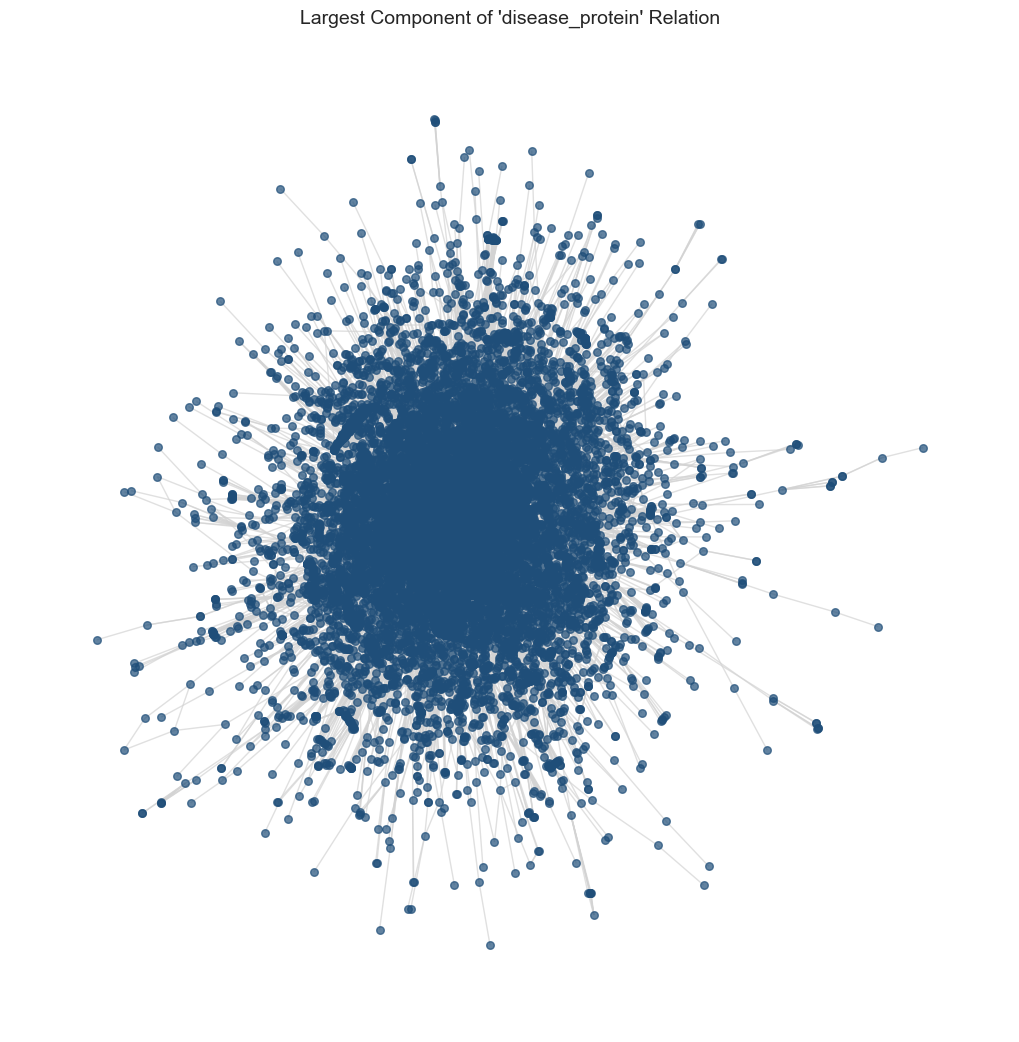

In [34]:
analyze_network_topology(filtered_df, relation_type="disease_protein")



Analyzing Relation: 'protein_protein'
Nodes: 18354, Edges: 321075
Connected Components: 5
Largest Component → Nodes: 18345, Edges: 321070
Average Clustering Coefficient: 0.1135
Average Shortest Path Length: 2.9845

Watts-Strogatz Model (n=18345, k=35, p=0.05)
  Clustering: 0.6243
  Average Path Length: 4.2980
Small-world characteristics not clearly observed.


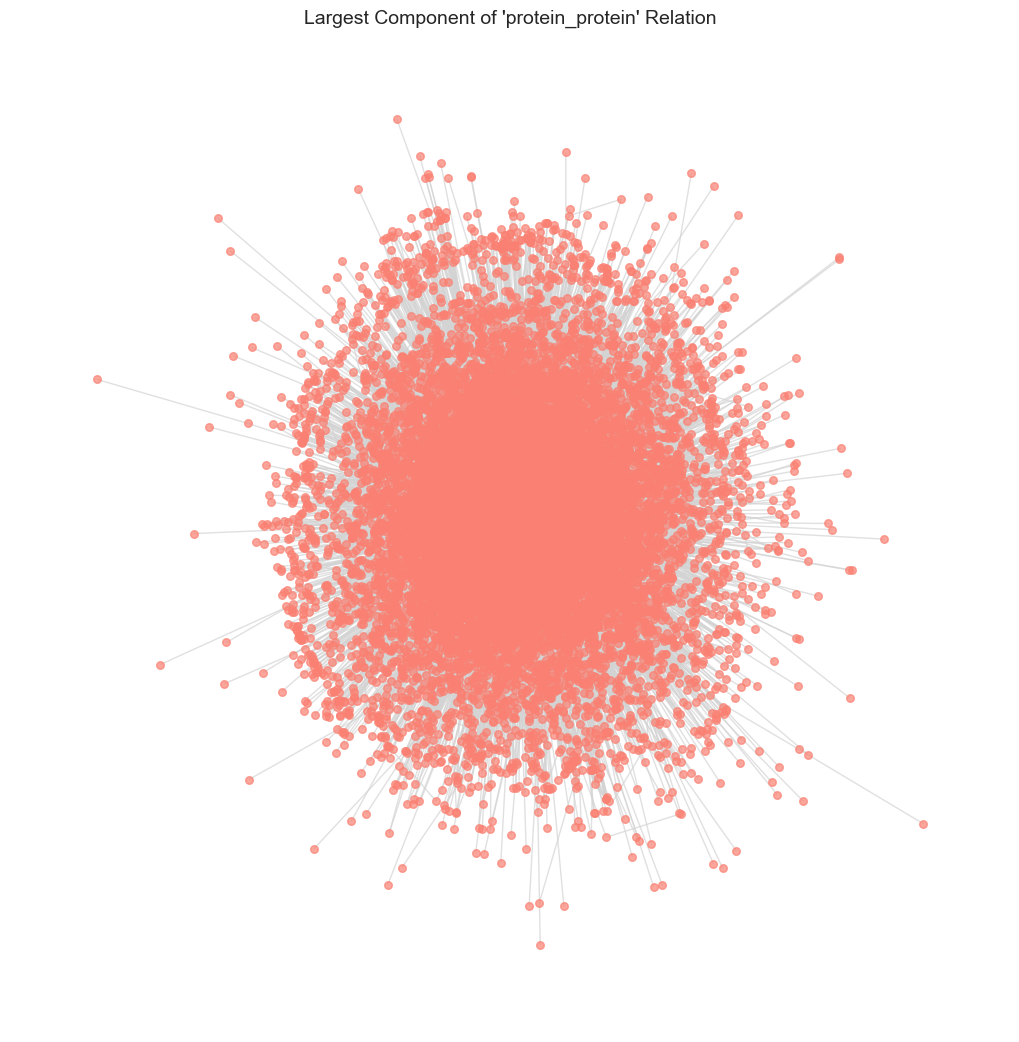

In [36]:
analyze_network_topology(filtered_df, relation_type="protein_protein")


## Section 5: Community Detection with Louvain Algorithm

In this section,   the Louvain method for community detection was applied on a selected subset of biomedical relations (`disease_protein`, `protein_protein`, `drug_protein`, `drug_effect`, and `disease_disease`). Louvain is a modularity-based algorithm that partitions the graph into densely connected groups — communities — with minimal external connections.

The function below does the following:

- Filtered for relevant relations from the knowledge graph.
- Detected communities and computed the modularity score.
- Visualized the top **K** largest communities using PyVis.
- Highlighted node types using different shapes and community memberships using unique colors.

This allows us to explore whether biological entities naturally cluster into interpretable modules (e.g., disease-drug-protein subgraphs).


In [37]:
from community import community_louvain
from pyvis.network import Network
from IPython.display import IFrame, display
import random
from collections import Counter

def detect_and_visualize_top_communities(
    df,
    relation_types=None,
    max_nodes=1500,
    top_k_communities=10,
    filename="html_files/top_communities_visualization.html"
):
    """
    Detects Louvain communities from selected relation types and visualizes only the top K communities.

    Parameters:
    - df: DataFrame with KG edges
    - relation_types: List of relation types to include (optional)
    - max_nodes: Max nodes for sampled subgraph
    - top_k_communities: Only the top K largest communities will be visualized
    - filename: Output HTML filename
    """

    if relation_types is None:
        relation_types = [
            "disease_protein",
            "protein_protein",
            "drug_protein",
            "drug_effect",
            "disease_disease"
        ]

    filtered = df[df["relation"].isin(relation_types)].copy()
    print(f"→ Filtered to {len(filtered)} edges from selected relation types.")

    G = nx.from_pandas_edgelist(filtered, source="x_name", target="y_name", create_using=nx.Graph())

    print("→ Running Louvain community detection...")
    partition = community_louvain.best_partition(G)
    nx.set_node_attributes(G, partition, "community")

    modularity = community_louvain.modularity(partition, G)
    print(f"→ Modularity Score: {modularity:.4f}")

    # Count community sizes
    community_counts = Counter(partition.values())
    top_communities = set([c for c, _ in community_counts.most_common(top_k_communities)])
    print(f"→ Visualizing Top {top_k_communities} communities (out of {len(community_counts)} total)")

    # Filter nodes for only top communities
    selected_nodes = [node for node, comm in partition.items() if comm in top_communities]
    G_sub = G.subgraph(selected_nodes).copy()

    # Sample for manageable size
    if len(G_sub) > max_nodes:
        G_sub = G_sub.subgraph(random.sample(list(G_sub.nodes()), max_nodes)).copy()

    # Recalculate visible partition for subgraph
    partition_sub = {n: partition[n] for n in G_sub.nodes()}

    # Build node type map
    type_map = pd.concat([
        filtered[["x_name", "x_type"]].rename(columns={"x_name": "node", "x_type": "type"}),
        filtered[["y_name", "y_type"]].rename(columns={"y_name": "node", "y_type": "type"})
    ]).drop_duplicates().set_index("node")["type"].to_dict()

    # Assign color per community
    community_colors = {}
    for c in top_communities:
        r = lambda: random.randint(100, 255)
        community_colors[c] = f'rgb({r()},{r()},{r()})'

    # Shape mapping for node types
    shape_map = {
        "gene/protein": "dot",
        "disease": "triangle",
        "drug": "box",
        "effect/phenotype": "diamond",
        "biological_process": "star"
    }

    # Create PyVis network
    net = Network(height="750px", width="100%", notebook=True, cdn_resources="remote")
    net.force_atlas_2based()

    for node in G_sub.nodes():
        comm = partition_sub.get(node, -1)
        color = community_colors.get(comm, "gray")
        ntype = type_map.get(node, "unknown")
        shape = shape_map.get(ntype, "dot")

        net.add_node(
            node,
            label=node,
            color=color,
            shape=shape,
            title=f"Type: {ntype}, Community: {comm}",
            size=18,
            font={"size": 20}
        )

    for u, v in G_sub.edges():
        net.add_edge(u, v)

    # Apply layout and show
    net.set_options("""
    var options = {
      "nodes": {
        "scaling": { "min": 10, "max": 30 }
      },
      "edges": {
        "color": { "inherit": true },
        "smooth": true
      },
      "physics": {
        "solver": "repulsion",
        "repulsion": {
          "nodeDistance": 150,
          "centralGravity": 0.05
        }
      }
    }
    """)

    net.show(filename)
    display(IFrame(filename, width="100%", height="750px"))


In [38]:
detect_and_visualize_top_communities(filtered_df)

→ Filtered to 1048234 edges from selected relation types.
→ Running Louvain community detection...
→ Modularity Score: 0.4795
→ Visualizing Top 10 communities (out of 50 total)
html_files/top_communities_visualization.html


## Section 6: Semantic & Structural Subgraphs
In large biomedical graphs, it's often useful to zoom in on the local neighborhood of a particular node—say, a disease like Schizophrenia or a protein like EGFR. This script helps us do exactly that by extracting a k-hop subgraph, i.e., all nodes that lie within k connections (or hops) from the target node.

Using PyVis for interactive visualization, this function doesn't just show who's connected to whom—it also colors nodes and edges based on their semantic types (e.g., drug, protein, disease) and relation types (e.g., drug-effect, disease-protein). This makes it easier to explore how diverse biological entities interact around a central concept.

Such structured and semantically-aware subgraphs are valuable for:

- Understanding how a biomedical concept is embedded in the larger network.

- Identifying functionally related or co-associated entities.

- Supporting hypothesis generation in biomedical research.

By limiting the number of edges and visualizing only nearby connections, we avoid overwhelming complexity while still revealing the rich, multi-relational structure of the knowledge graph.

## Structured Khop subgraph with Edges

In [39]:

def visualize_structured_khop_subgraph(
    df,
    target_node,
    k=2,
    max_edges=200,
    filename="html_files/structured_khop_subgraph_v2.html"
):
    """
    Extracts a k-hop subgraph around a node and visualizes nodes and typed edges using PyVis.

    Parameters:
    - df: DataFrame with 'x_name', 'y_name', 'relation', 'x_type', 'y_type'
    - target_node: Central node to extract the subgraph from
    - k: Number of hops to consider
    - max_edges: Trim subgraph if it's too large
    - filename: Output HTML filename
    """

    print(f"Finding {k}-hop neighbors of '{target_node}'...")

    # Step 1: Build undirected graph for k-hop traversal
    G_full = nx.from_pandas_edgelist(df, source="x_name", target="y_name")

    if target_node not in G_full.nodes:
        print(f"Target node '{target_node}' not found.")
        return

    khop_nodes = set(nx.single_source_shortest_path_length(G_full, target_node, cutoff=k).keys())

    # Step 2: Filter edges where both ends are in k-hop neighborhood
    sub_df = df[df["x_name"].isin(khop_nodes) & df["y_name"].isin(khop_nodes)].copy()

    print(f" Subgraph contains {len(sub_df)} edges.")
    if len(sub_df) > max_edges:
        sub_df = sub_df.sample(n=max_edges, random_state=42)
        print(f" Subgraph trimmed to {max_edges} edges.")

    # Step 3: Final active nodes
    active_nodes = set(sub_df["x_name"]).union(sub_df["y_name"])

    # Step 4: Precompute node types for all
    type_map = pd.concat([
        df[["x_name", "x_type"]].rename(columns={"x_name": "node", "x_type": "type"}),
        df[["y_name", "y_type"]].rename(columns={"y_name": "node", "y_type": "type"})
    ]).drop_duplicates().set_index("node")["type"].to_dict()

    # Step 5: Define visual colors
    node_color_map = {
        "gene/protein": "skyblue",
        "disease": "salmon",
        "drug": "lightgreen",
        "effect/phenotype": "orchid",
        "biological_process": "gray"
    }

    edge_color_map = {
        "protein_protein": "gray",
        "disease_protein": "purple",
        "drug_protein": "green",
        "drug_effect": "orange",
        "disease_disease": "red",
        "bioprocess_protein": "blue"
    }

    # Step 6: Initialize PyVis
    net = Network(height="750px", width="100%", notebook=True, cdn_resources="remote")
    net.force_atlas_2based()

    # Add nodes
    for node in active_nodes:
        node_type = type_map.get(node, "unknown")
        color = node_color_map.get(node_type, "lightgray")
        label = node if len(node) <= 25 else node[:22] + "..."

        net.add_node(
            node,
            label=label,
            title=f"{node} ({node_type})",
            color=color,
            size=25 if node == target_node else 15,
            font={"size": 20 if node == target_node else 16}
        )

    # Add edges
    for _, row in sub_df.iterrows():
        rel = row["relation"]
        color = edge_color_map.get(rel, "lightgray")

        net.add_edge(
            row["x_name"],
            row["y_name"],
            title=rel,
            color=color,
            width=2
        )

    # Optional layout
    net.set_options("""
    var options = {
      "nodes": {
        "scaling": { "min": 10, "max": 30 }
      },
      "edges": {
        "smooth": true
      },
      "physics": {
        "solver": "forceAtlas2Based",
        "forceAtlas2Based": {
          "gravitationalConstant": -50,
          "centralGravity": 0.01
        }
      }
    }
    """)

    net.show(filename)
    display(IFrame(filename, width="100%", height="750px"))
    return f"[INFO] Subgraph visualization saved to {filename}"


In [40]:
visualize_structured_khop_subgraph(
    df=filtered_df,
    target_node="breast cancer",
    k=2,
    max_edges=200
)

Finding 2-hop neighbors of 'breast cancer'...
 Subgraph contains 1015538 edges.
 Subgraph trimmed to 200 edges.
html_files/structured_khop_subgraph_v2.html


'[INFO] Subgraph visualization saved to html_files/structured_khop_subgraph_v2.html'

## Graph Traversals & Explanatory Views Shortest Paths

In [41]:


def visualize_shortest_path(df, source, target, filename="html_files/shortest_path.html"):
    """
    Find and visualize the shortest path between two nodes using PyVis.
    
    Parameters:
    - df: DataFrame with 'x_name', 'y_name', 'relation', 'x_type', 'y_type'
    - source: Starting node (e.g. a drug or disease)
    - target: Destination node (e.g. a phenotype or gene)
    - filename: HTML output file
    """

    # Step 1: Create undirected graph
    G = nx.from_pandas_edgelist(df, source="x_name", target="y_name")

    if source not in G or target not in G:
        print(f"Either '{source}' or '{target}' not found in graph.")
        return

    try:
        path = nx.shortest_path(G, source=source, target=target)
        print(f"→ Shortest path from '{source}' to '{target}' found. Length = {len(path)-1}")
    except nx.NetworkXNoPath:
        print(f"No path exists between '{source}' and '{target}'")
        return

    # Step 2: Extract subgraph edges between consecutive pairs in path
    path_edges = list(zip(path[:-1], path[1:]))

    # Filter original df to find matching edges with relation types
    rel_edges = []
    for u, v in path_edges:
        row = df[((df["x_name"] == u) & (df["y_name"] == v)) | ((df["x_name"] == v) & (df["y_name"] == u))]
        if not row.empty:
            rel_edges.append(row.iloc[0])
        else:
            rel_edges.append(pd.Series({"x_name": u, "y_name": v, "relation": "unknown"}))

    path_df = pd.DataFrame(rel_edges)

    # Step 3: Get node types
    type_map = pd.concat([
        df[["x_name", "x_type"]].rename(columns={"x_name": "node", "x_type": "type"}),
        df[["y_name", "y_type"]].rename(columns={"y_name": "node", "y_type": "type"})
    ]).drop_duplicates().set_index("node")["type"].to_dict()

    # Step 4: Color maps
    node_color_map = {
        "gene/protein": "skyblue",
        "disease": "salmon",
        "drug": "lightgreen",
        "effect/phenotype": "orchid",
        "biological_process": "gray"
    }

    edge_color_map = {
        "protein_protein": "gray",
        "disease_protein": "purple",
        "drug_protein": "green",
        "drug_effect": "orange",
        "disease_disease": "red",
        "bioprocess_protein": "blue"
    }

    # Step 5: PyVis
    net = Network(height="650px", width="100%", notebook=True, cdn_resources="remote")
    net.force_atlas_2based()

    for node in path:
        ntype = type_map.get(node, "unknown")
        color = node_color_map.get(ntype, "lightgray")
        net.add_node(
            node,
            label=node if len(node) <= 25 else node[:22] + "...",
            title=f"{node} ({ntype})",
            color=color,
            size=25,
            font={"size": 20}
        )

    for _, row in path_df.iterrows():
        rel = row["relation"]
        color = edge_color_map.get(rel, "lightgray")
        net.add_edge(
            row["x_name"],
            row["y_name"],
            title=rel,
            label=rel,
            color=color,
            width=3,
            font={"size": 16, "align": "top"}
        )

    net.set_options("""
var options = {
  "nodes": {
    "shape": "dot",
    "scaling": {
      "min": 10,
      "max": 30
    }
  },
  "edges": {
    "smooth": {
      "type": "cubicBezier",
      "forceDirection": "horizontal",
      "roundness": 0.4
    },
    "color": {
      "inherit": false
    },
    "length": 300,
    "font": {
      "size": 14,
      "align": "top"
    }
  },
  "physics": {
    "enabled": true,
    "solver": "forceAtlas2Based",
    "forceAtlas2Based": {
      "gravitationalConstant": -80,
      "centralGravity": 0.01,
      "springLength": 350,
      "springConstant": 0.02,
      "avoidOverlap": 1
    },
    "minVelocity": 0.75,
    "stabilization": {
      "enabled": true,
      "iterations": 1000,
      "updateInterval": 25
    }
  }
}
""")


    net.show(filename)
    display(IFrame(filename, width="100%", height="700px"))


In [42]:
visualize_shortest_path(filtered_df, source="Tamoxifen", target="autism spectrum disorder")

→ Shortest path from 'Tamoxifen' to 'autism spectrum disorder' found. Length = 2
html_files/shortest_path.html


In [43]:
visualize_shortest_path(filtered_df, source="breast cancer", target="lung cancer")

→ Shortest path from 'breast cancer' to 'lung cancer' found. Length = 2
html_files/shortest_path.html


## Exploring Causality
Causal Subgraph Analysis
This section identifies and visualizes potential causal relationships in the PrimeKG knowledge graph based on biomedical edge labels that imply directionality (e.g., drug-target, enzyme, side effect).


This function analyze_causal_subgraph():

- Filters edges with causal semantics (e.g., side effect, target, indication).

- Summarizes node types involved in causal relationships.

- Optionally focuses on a k-hop neighborhood around a specific node (e.g., "aspirin").

Visualizes the resulting subgraph using PyVis with directional arrows and color-coded node types.

In [44]:

from IPython.display import IFrame, display
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz


def analyze_causal_subgraph(
    df,
    display_relation_column="display_relation",
    k_hop_center=None,
    k_hop=2,
    html_filename="html_files/causal_subgraph.html"
):
    """
    Analyze and visualize causal-like subgraphs in PrimeKG.

    Parameters:
    - df: Full filtered_df DataFrame.
    - display_relation_column: Column that stores display relation labels.
    - k_hop_center: Optional node name to extract a k-hop neighborhood for zoom-in.
    - k_hop: Number of hops for k-hop neighborhood.
    - html_filename: Output filename for PyVis visualization.
    """



    # Step 1: Define causal relations
    causal_labels = [
        "side effect", "target", "indication",
        "contraindication", "enzyme", "transporter", "carrier"
    ]

    # Step 2: Filter causal edges
    if display_relation_column not in df.columns:
        raise ValueError(f"'{display_relation_column}' column not found in DataFrame.")

    causal_df = df[df[display_relation_column].isin(causal_labels)].copy()
    if causal_df.empty:
        print(" No causal relations found. Check the column or label list.")
        return

    print(f"Total causal edges extracted: {len(causal_df):,}")

    # Step 3: Node type distribution
    node_types = pd.concat([
        causal_df[["x_name", "x_type"]].rename(columns={"x_name": "node", "x_type": "type"}),
        causal_df[["y_name", "y_type"]].rename(columns={"y_name": "node", "y_type": "type"})
    ]).drop_duplicates()

    type_counts = node_types.groupby("type").size().reset_index(name="count")
    print("\nNode Type Distribution:")
    print(type_counts.sort_values("count", ascending=False))

    # Optional: Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(data=type_counts, x="type", y="count", palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Node Type Distribution in Causal Subgraph")
    plt.tight_layout()
    plt.show()

    # Step 4: Build directed graph
    G = nx.from_pandas_edgelist(
        causal_df,
        source="x_name",
        target="y_name",
        create_using=nx.DiGraph()
    )

    # Step 5: K-hop filtering (optional)
    if k_hop_center:
        if k_hop_center not in G.nodes:
            print(f" Node '{k_hop_center}' not found in graph.")
            return
        nodes = nx.single_source_shortest_path_length(G, k_hop_center, cutoff=k_hop).keys()
        G = G.subgraph(nodes).copy()
        print(f"Extracted {len(G.nodes())} nodes in {k_hop}-hop neighborhood of '{k_hop_center}'.")

    # Step 6: Prepare maps for visualization
    type_map = node_types.set_index("node")["type"].to_dict()
    relation_map = causal_df.set_index(["x_name", "y_name"])[display_relation_column].to_dict()

    color_map = {
        "gene/protein": "skyblue",
        "disease": "salmon",
        "drug": "lightgreen",
        "effect/phenotype": "orchid",
        "biological_process": "gray"
    }

    # Step 7: PyVis visualization
    net = Network(height="700px", width="100%", directed=True, notebook=True, cdn_resources="remote")
    net.force_atlas_2based()

    for node in G.nodes():
        ntype = type_map.get(node, "unknown")
        color = color_map.get(ntype, "lightgray")
        label = node if len(node) <= 25 else node[:22] + "..."
        net.add_node(node, label=label, title=f"{node} ({ntype})", color=color, size=25)

    for u, v in G.edges():
        rel = relation_map.get((u, v), "causal")
        net.add_edge(u, v, title=rel, label=rel, color="purple", arrows="to")

    net.set_options("""
    var options = {
      "edges": {
        "smooth": true,
        "length": 400
      },
      "physics": {
        "solver": "forceAtlas2Based",
        "forceAtlas2Based": {
          "gravitationalConstant": -50,
          "centralGravity": 0.01,
          "springLength": 300,
          "springConstant": 0.02
        },
        "minVelocity": 0.75
      }
    }
    """)

    net.show(html_filename)
    display(IFrame(html_filename, width="100%", height="750px"))
    return G


Total causal edges extracted: 261,000

Node Type Distribution:
               type  count
1              drug   6681
3      gene/protein   3094
0           disease   1937
2  effect/phenotype    990


/var/folders/ht/cmjf8n0d4m92s779lvtr3kcr0000gn/T/ipykernel_60858/3074166180.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_counts, x="type", y="count", palette="viridis")


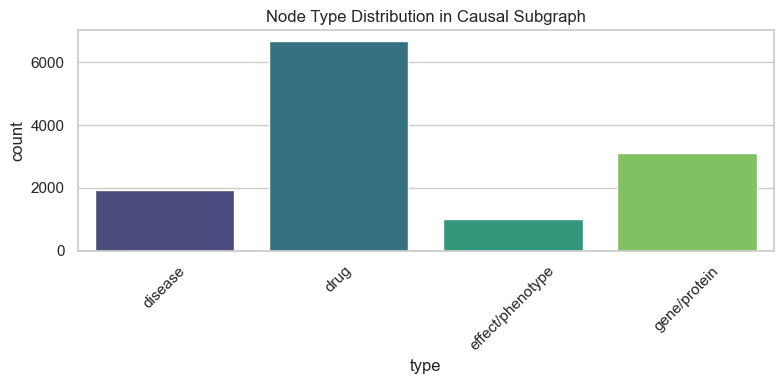

Extracted 31 nodes in 2-hop neighborhood of 'breast cancer'.
html_files/causal_subgraph.html


In [45]:
causal_G = analyze_causal_subgraph(filtered_df, k_hop_center="breast cancer", k_hop=2)